# F-test

## Import packages

In [62]:
'''
Credit to GitHub user Jaimin09
Link: https://github.com/Jaimin09/Coding-Lane-Assets/tree/main/Logistic%20Regression%20in%20Python%20from%20Scratch
Last accessed: 28/10/2021
'''
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
import scipy
import v1_model as v1
import v2_model as v2


from scipy import stats
from scipy.stats import norm



In [63]:
# List containing medals earned for each athlete  
Y_list = ['MedalEarned']

# ! Get dataset
filepath = 'Datasets/expert_data.csv' # Data for Specialized athletes i.e. competing in one sport
df = pd.read_csv(filepath)
df = df.reset_index() # Resets index for dataset 

# Import data and set seed 

## Weights, data  and probability predictions for v1

In [64]:
# List of variables we are interested in 
X_list_v1 = ['Height',
             'Weight',
             'Age']

# Import model weights after v1_model has been run 
W_array = np.genfromtxt('Parameters/W.csv', delimiter=',')# Len of array is equal to iterations
B_array = np.genfromtxt('Parameters/B.csv', delimiter=',')

In [65]:
# Produce weight for model
def ProduceWeights(df, W, B, X_list):

    # Get data for model
    X_model_df = df[X_list] # Dataframe contains X_list columns 
    Y_model_df = df[Y_list]
    
    X_array, Y_array = v2.Reshape(X_model_df, Y_model_df) # Drops ID and transforms each column to a numpy array

    # Get model guesses 
    
    # Use dot product on weights and the variable values for each athlete i.e. Ath1 = w1*var1 + w2*var2(..) + B
    lin_func = np.dot(W.T, X_array) + B
    
    # Use linear expression in sigmoid function to get model guess for each athlete 
    sf = v2.Sigmoid(lin_func) 
    print(sf)
    
    return sf

### F test loop v1

In [66]:
# Generate model predictions in two cases. 
# 0. Model weights remain unchanged 
# 1. ith weight is set to 0
# Append model guesses to lists dependent on  the number of variables i.e. 4 variables creates a list of 4 arrays. 

def f_test_loop_v1(df, W, B, X_list):
    
    # Store model guesses with weights unchanged, and create empty list to store model prediction with weights changed
    pred_prob_result_list = []
    pred_prob = ProduceWeights(df, W, B, X_list)
    
    for index, element in enumerate(X_list):
        
        # Print output for each iteration
        print(f'The current index is {index}')
        print(f'The current element is {element}')
        
        # Change weights back to values found in W
        W_test = copy.deepcopy(W)
        
        W_test[index] = 0 # index weight set to 0
        
        # Get a list of model guesses where weights are changed
        pred_prob_result = ProduceWeights(df, W_test, B, X_list)
        #print(pred_prob_result)
        
        # Append array of model guesses to list 
        pred_prob_result_list.append(pred_prob_result)
    
    return pred_prob, pred_prob_result_list

In [67]:
# Get first weight in CSV file of weights 
W_par = np.array([W_array[0][0], W_array[1][0], W_array[2][0]], ndmin= 0)
B_par = B_array[0]

# Create list of arrays of model guesses 
pred_prob_v1, pred_prob_result_list_v1 = f_test_loop_v1(df, W_par, B_par, X_list_v1) 

[1. 1. 1. ... 1. 1. 1.]
The current index is 0
The current element is Height
[0.95944658 0.92603867 0.88098721 ... 0.89153545 0.88822556 0.86130504]
The current index is 1
The current element is Weight
[1. 1. 1. ... 1. 1. 1.]
The current index is 2
The current element is Age
[1. 1. 1. ... 1. 1. 1.]


## Weights, data  and probability predictions for v2

In [68]:
X_list_v2 = ['PreviousMedals', 'NOC_advantage', 'Height_div_avg', 'Weight_div_avg', 'Age_div_avg']
#'PreviousMedals', 

Accuracy of the model is : 83.15 %


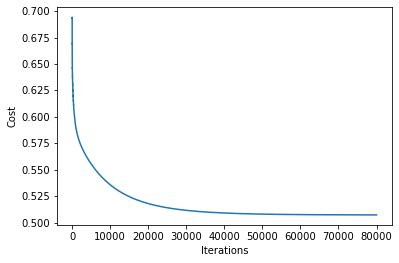

In [69]:
# Run v2_model
cop = 0.6
W, B, val_acc, val_occ_dic, X_val, Y_val = v2.RunModel(df, X_list_v2, Y_list, cop, iterations= 80000, learning_rate= 0.0223)
sf = v2.PredProb(X_val, W, B)

### F test loop v2

In [70]:
# Generate model predictions in two cases. 
# 0. Model weights remain unchanged 
# 1. ith weight is set to 0
# Append model guesses to lists dependent on  the number of variables i.e. 4 variables creates a list of 4 arrays. 

def f_test_loop_v2(sf, W, B, X_val, X_list):
    
    # Store model guesses with weights unchanged, and create empty list to store model prediction with weights changed
    pred_prob_result_list = []
    
    for index, element in enumerate(X_list):
        
        # Print output for each iteration
        print(f'The current index is {index}')
        print(f'The current element is {element}')
        
        # Change weights back to values found in W
        W_test = copy.deepcopy(W)
        
        W_test[index] = 0 # index weight set to 0
        
        # Get a list of model guesses where weights are changed
        pred_prob_result = v2.PredProb(X_val, W_test, B)
        #print(pred_prob_result)
        
        # Append array of model guesses to list 
        pred_prob_result_list.append(pred_prob_result)
    
    return pred_prob_result_list

In [71]:
pred_prob_result_list_v2 = f_test_loop_v2(sf, W, B, X_val, X_list_v2)

The current index is 0
The current element is PreviousMedals
The current index is 1
The current element is NOC_advantage
The current index is 2
The current element is Height_div_avg
The current index is 3
The current element is Weight_div_avg
The current index is 4
The current element is Age_div_avg


# Normality 

## Normality plot v1

In [72]:
### TO DO  

def dist_plot_v1(my_array):
    
    # Create displots for elements in probablity array 
    
    # Check whether it is an array or an array of arrays
    if my_array[0][0] >= 0: 
        for i, element in enumerate(my_array):
            sns.displot(my_array[i])
    else:
        sns.displot(my_array)

#dist_plot(pred_prob_v1)
        
#sns.displot(pred_prob_v1)
#sns.displot(pred_prob_result_list_v1)

# Get qqplot 
#fig = plt.figure()
#res = stats.probplot(train['SalePrice'], plot=plt)
#plt.show()


pred_prob_result_list_v1

[array([0.95944658, 0.92603867, 0.88098721, ..., 0.89153545, 0.88822556,
        0.86130504]),
 array([1., 1., 1., ..., 1., 1., 1.]),
 array([1., 1., 1., ..., 1., 1., 1.])]

## Normality plot v2

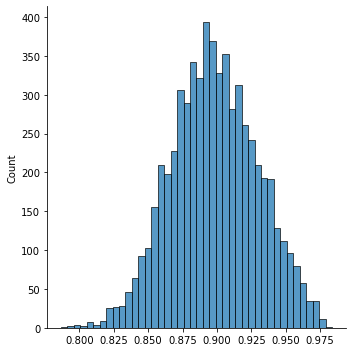

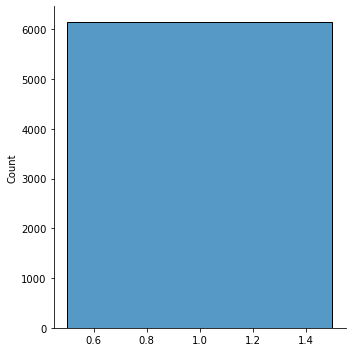

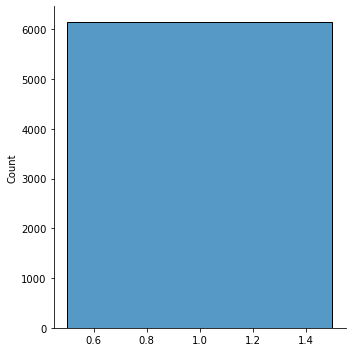

In [73]:
dist_plot_v1(pred_prob_result_list_v1)

# F-test

In [74]:
# F-test: https://link.springer.com/book/10.1007%2F978-3-319-46162-5 
# Code adapted from: https://www.statology.org/f-test-python/

# F test arrays of model guesses 
# 0. Model weights remain unchanged 
# 1. ith weight is set to 0

def f_test(sig_0_probabilities,sig_1_probabilities, X_list):
    f_test_list = []
    
    for i in range(len(sig_1_probabilities)):
        f = np.var(sig_0_probabilities, ddof=1)/np.var(sig_1_probabilities[i], ddof=1) #calculate F test statistic 
        dfn = sig_0_probabilities.size-1 #define degrees of freedom numerator 
        dfd = sig_1_probabilities[i].size-1 #define degrees of freedom denominator 
        p = 1-scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic
        f_test_list.append(p)
        
        # Print current variable and p value 
        print(f'The current variable is: {X_list[i]}\nThe current p-value is: {p}')
        
        # Define alpha and print conclusion of hypothesis test 
        if p <= 0.05:
            print(f"null hypothesis is rejected: p-value = {p}.\nThe probablity of the two distributions' variance being equal is low.\nThe variable is likely to impact model output.\n")
        else:
            print(f"null hypothesis cannot be rejected: p-value = {p}.\nThe probablity of the two distributions' variance being equal is high.\nThe variable is unlikely to impact model output.\n") 
    
    return f_test_list

In [75]:
f_test_list_v1 = f_test(pred_prob_v1, pred_prob_result_list_v1, X_list_v1)

The current variable is: Height
The current p-value is: 1.0
null hypothesis cannot be rejected: p-value = 1.0.
The probablity of the two distributions' variance being equal is high.
The variable is unlikely to impact model output.

The current variable is: Weight
The current p-value is: nan
null hypothesis cannot be rejected: p-value = nan.
The probablity of the two distributions' variance being equal is high.
The variable is unlikely to impact model output.

The current variable is: Age
The current p-value is: nan
null hypothesis cannot be rejected: p-value = nan.
The probablity of the two distributions' variance being equal is high.
The variable is unlikely to impact model output.



C:\Users\danie\AppData\Local\Temp/ipykernel_20988/1513886369.py:12: RuntimeWarning: invalid value encountered in double_scalars
  f = np.var(sig_0_probabilities, ddof=1)/np.var(sig_1_probabilities[i], ddof=1) #calculate F test statistic


In [76]:
f_test_list_v2 = f_test(sf, pred_prob_result_list_v2, X_list_v2)

The current variable is: PreviousMedals
The current p-value is: 1.608279905140897e-05
null hypothesis is rejected: p-value = 1.608279905140897e-05.
The probablity of the two distributions' variance being equal is low.
The variable is likely to impact model output.

The current variable is: NOC_advantage
The current p-value is: 1.1102230246251565e-16
null hypothesis is rejected: p-value = 1.1102230246251565e-16.
The probablity of the two distributions' variance being equal is low.
The variable is likely to impact model output.

The current variable is: Height_div_avg
The current p-value is: 3.3195227677751404e-09
null hypothesis is rejected: p-value = 3.3195227677751404e-09.
The probablity of the two distributions' variance being equal is low.
The variable is likely to impact model output.

The current variable is: Weight_div_avg
The current p-value is: 0.09351866029009925
null hypothesis cannot be rejected: p-value = 0.09351866029009925.
The probablity of the two distributions' varianc